# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [8]:
# Libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Matplotlib inline para visualizar los gráficos de Matplotlib
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

# Configuración para setear y que todas las fig de Seaborn salgan por defecto con este tamaño
# Se puede especificar el tamaño de cada figura
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [3]:
# your code here
fitbit = pd.read_csv('../data/Fitbit2.csv')

In [7]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        367 non-null    object 
 1   Calorie burned              367 non-null    int64  
 2   Steps                       367 non-null    int64  
 3   Distance                    367 non-null    float64
 4   Floors                      367 non-null    int64  
 5   Minutes Sedentary           367 non-null    float64
 6   Minutes Lightly Active      367 non-null    int64  
 7   Minutes Fairly Active       367 non-null    int64  
 8   Minutes Very Active         367 non-null    int64  
 9   Activity Calories           367 non-null    int64  
 10  MinutesOfSleep              367 non-null    int64  
 11  MinutesOfBeingAwake         367 non-null    int64  
 12  NumberOfAwakings            367 non-null    int64  
 13  LengthOfRestInMinutes       367 non

In [17]:
fitbit.isna().sum()

Date                          0
Calorie burned                0
Steps                         0
Distance                      0
Floors                        0
Minutes Sedentary             0
Minutes Lightly Active        0
Minutes Fairly Active         0
Minutes Very Active           0
Activity Calories             0
MinutesOfSleep                0
MinutesOfBeingAwake           0
NumberOfAwakings              0
LengthOfRestInMinutes         0
Distance_miles                0
Days                          0
Days_encoded                  0
Work_or_Weekend               0
Hours Sleep                   0
Sleep efficiency              0
Yesterday_sleep               0
Yesterday_sleep_efficiency    0
Months                        0
Months_encoded                0
dtype: int64

In [14]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [27]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,...,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months_encoded
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,...,16.196185,321.343324,5.312180,3.010899,0.713896,4.841326,76.362799,4.818529,76.119842,6.501362
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,...,10.757622,170.786726,2.118801,1.998604,0.452555,2.579205,32.973194,2.584930,33.206279,3.459267
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,...,7.000000,248.000000,3.824539,1.000000,0.000000,3.733333,86.238532,3.725000,86.233673,3.500000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,...,16.000000,370.000000,5.151166,3.000000,1.000000,5.616667,89.433962,5.600000,89.433962,7.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,...,24.000000,440.500000,6.561678,5.000000,1.000000,6.675000,92.438419,6.650000,92.438419,9.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,...,45.000000,607.000000,12.707037,6.000000,1.000000,9.216667,100.000000,9.216667,100.000000,12.000000


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

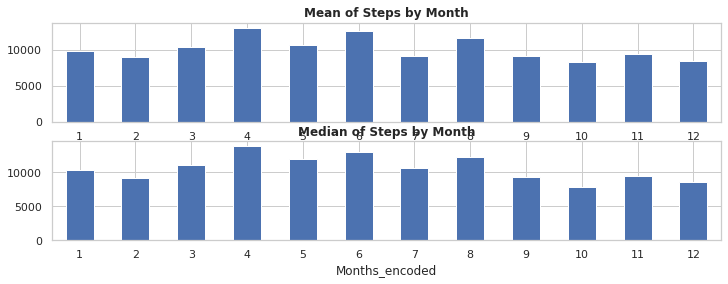

In [147]:
# AVERAGE STEPS BY MONTH_ENCODED
fig, ax = plt.subplots(2, 1)
plt.sca(ax[0])
fitbit.groupby("Months_encoded").mean()['Steps'].plot(kind="bar", figsize=(12,4))
plt.title('Mean of Steps by Month', fontweight ="bold");
plt.xticks(rotation=0);
plt.xlabel("");

plt.sca(ax[1])
fitbit.groupby("Months_encoded").median()['Steps'].plot(kind="bar", figsize=(12,4))
plt.title('Median of Steps by Month', fontweight ="bold");

plt.xticks(rotation=0);
fig.figure.savefig("../figures/01_Steps_by_month.png", dpi=1000)



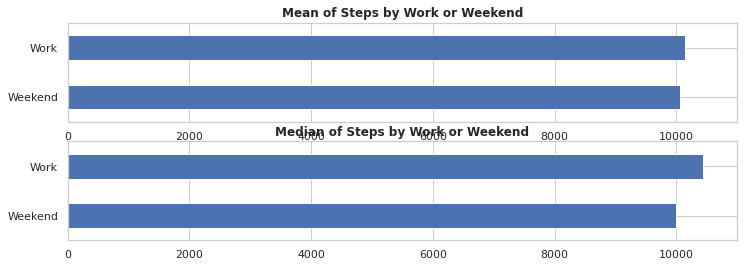

In [148]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
fig, ax = plt.subplots(2, 1)
plt.sca(ax[0])
fitbit.groupby("Work_or_Weekend").mean()['Steps'].plot(kind="barh", figsize=(12,4))
plt.title('Mean of Steps by Work or Weekend', fontweight ="bold");
plt.xlabel("");
plt.xlim(0,11000)
plt.yticks([0, 1], ['Weekend', 'Work']);
plt.ylabel("");

plt.sca(ax[1])
fitbit.groupby("Work_or_Weekend").median()['Steps'].plot(kind="barh", figsize=(12,4))
plt.title('Median of Steps by Work or Weekend', fontweight ="bold");
plt.xticks(rotation=0);
plt.xlim(0,11000)
plt.yticks([0, 1], ['Weekend', 'Work']);
plt.ylabel("");

fig.figure.savefig("../figures/02_Steps_by_Work_or_Weekend.png", dpi=1000)


#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

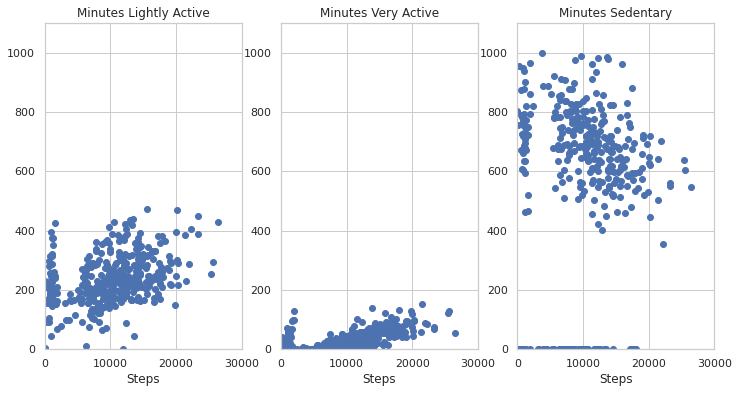

In [144]:
grafics = [{'xaxis' : 'Steps',
            'yaxis' : 'Minutes Lightly Active'},
           {'xaxis' : 'Steps',
            'yaxis' : 'Minutes Very Active'},
           {'xaxis' : 'Steps',
            'yaxis' : 'Minutes Sedentary'}]

fig, axs = plt.subplots(1, 3)
plt.title("Steps/Minute depending on the activity")
for i in range(len(axs)) :
    plt.sca(axs[i])
    plt.scatter(x=fitbit[grafics[i]['xaxis']], y=fitbit[grafics[i]['yaxis']]);
    plt.title(grafics[i]['yaxis']);
    plt.xlabel(grafics[i]['xaxis']);
    plt.ylim(0,1100);
    plt.xlim(0,30000);


fig.figure.savefig("../figures/03_Minutes_required_to_increase_steps_depending_on_activity_grade.png", dpi=1000)

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [149]:
titanic = pd.read_csv('../data/titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [150]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [151]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.879186,0.498854,0.385027,33.281086
std,378.020061,0.486592,0.837836,13.448335,1.041658,0.865560,51.741500
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,37.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [153]:
titanic.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [152]:
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [156]:
# NUMERICAL VARIABLES
titanic.select_dtypes(include=np.number)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [159]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(include=object)

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [184]:
plt.style.use('classic')

#### Use the right visulalization to show the distribution of column `Age`.

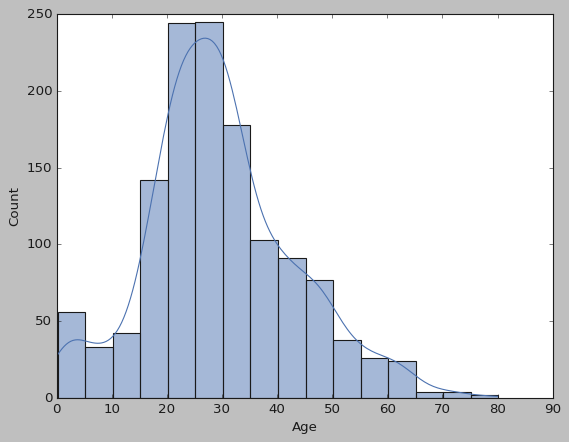

In [185]:
fig04 = sns.histplot(x=titanic.Age, kde=True , binwidth=5);

fig04.figure.savefig("../figures/04_Age_distribution_of_Titanic_passengers.png", dpi=1000)

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

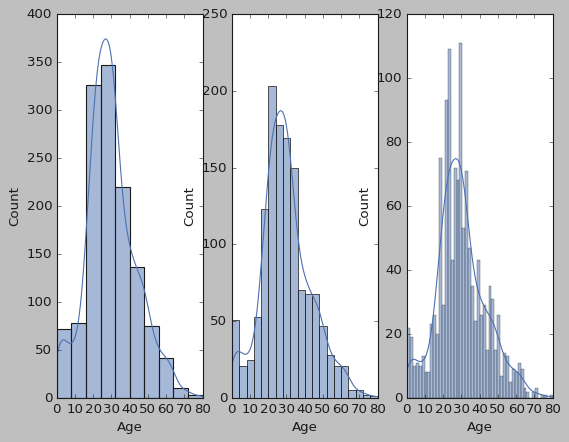

In [179]:
fig05 , axs = plt.subplots(1, 3)

plt.sca(axs[0])
sns.histplot(x=titanic.Age, kde=True , bins=10)
plt.sca(axs[1])
sns.histplot(x=titanic.Age, kde=True , bins=20)
plt.sca(axs[2])
sns.histplot(x=titanic.Age, kde=True , bins=50)

fig05.figure.savefig("../figures/05_Age_distribution_of_Titanic_passengers_differents_bins.png", dpi=1000)


#### How does the bin size affect your plot?

In [ ]:
"""
The more bins the more variability is shown. 
Nevertheless, using a very low number of bins, it will hide the trend of the curve.
My oppinion is the best representation is given with 10 bins, as it follows the curve perfectly and it smoths the effects of outliers.
"""

#### Use seaborn to show the distribution of column `Age`.

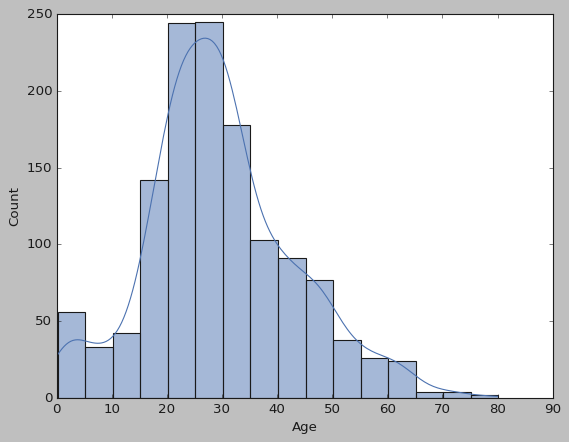

In [186]:
fig06 = sns.histplot(x=titanic.Age, kde=True , binwidth=5);

fig06.figure.savefig("../figures/06_Age_distribution_of_Titanic_passengers.png", dpi=1000)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

In [ ]:
# Method 2 - seaborn
# your code here

#### Use the right plot to visualize the column `Pclass`.

In [ ]:
# your code here

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

In [ ]:
# Method 2 - seaborn
# your code here

#### Plot the correlation matrix using seaborn.

In [ ]:
# your code here

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
# your code here

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here